### Do analysis on indv images for `test-2-easy`

This is a one-off notebook. See/fork [analyze-expmod-template.ipynb](./analyze-expmod-template.ipynb) for full markdown description of what's going on.

We are looking at expmod-(a/b)-(0,...32)

Or looking at the top5 models.

We're testing on regulation-test-easy, a hand sorted corpus of 162 of the "easiest" images which remove blurry and 

**Results:** 
 - We find 6 difficult images* in this dataset:
   - one blurry king which is truly difficult
   - two normal queens
   - bishop viewed from bird's eye angle
   
 - Vote Agg works well, with perf 3% better than best model (94% acc -> 97% acc)
 
 *: '02c00069_black-queen.jpg',
 '02c00124_black-king.jpg',
 '01c00054_white-queen.jpg',
 '01c00029_white-bishop.jpg',
 '01c00052_white-bishop.jpg',
 '01c00010_black-queen.jpg'




In [1]:
import json, os, sys
import pandas as pd
sys.path.append('..')

In [18]:
grid_series = 'expmod2easy'
path_model_analysis = '../models/model-analysis/'
test_path = '../../../other-chess-data/regulation-test-2-easy/'

In [17]:
!ls ../../../other-chess-dataregulation-pieces-2-easy/

Convert-Pascal-VOC-to-COCO  regulation-pieces-2     regulation-test-all
regulation-pieces-1	    regulation-test-2-easy


In [3]:
df_agg = pd.read_csv(path_model_analysis + 
                     grid_series +
                     '-df_agg.csv')

In [4]:
df_pred = pd.read_csv(path_model_analysis + 
                     grid_series +
                     '-df_pred.csv')

### Compare per item perf

In [6]:
mod_names = [col.split('_')[1] for col in df_pred.columns 
             if 'pred_' in col]

df_correct = pd.DataFrame([])

for mod_name in mod_names:
    
    df_correct[mod_name] = (
      (df_pred['actual'] == 
       df_pred['pred_' + mod_name]).astype('int')
    )

In [7]:
from matplotlib import pyplot as plt
from IPython.display import display
from PIL import Image
import numpy as np

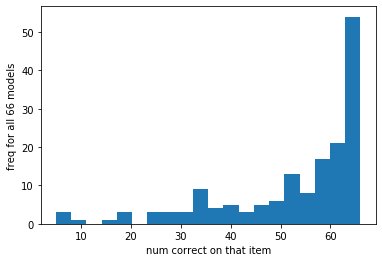

In [28]:
plt.hist(df_correct.sum(axis=1), bins=20);
plt.xlabel('num correct on that item')
plt.ylabel('freq for all 66 models');

##### Select Top models

In [29]:
top5 = [
'expmod-b-1',
'expmod-b-10', 
'expmod-b-6', 
'expmod-b-2', 
'expmod-b-27'
]

In [30]:
df_correct_top5 = df_correct.loc[:, top5]

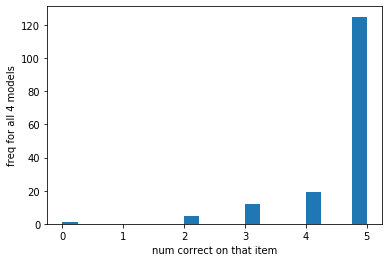

In [33]:
plt.hist(df_correct_top5.sum(axis=1), bins=20);
plt.xlabel('num correct on that item')
plt.ylabel('freq for all 4 models');

#### Most difficult Images for `test-2-easy`
Tend to be blurry or king in difficult pose.

##### All models

In [19]:
max_correct = 20
mask_difficult = (df_correct.sum(axis=1) <= max_correct)
difficults = df_pred[mask_difficult]
difficults.iloc[:,:4]

,fn,label,actual,pred_expmod-a-18
32,02c00150_white-king.jpg,white-king,7,8
45,02c00069_black-queen.jpg,black-queen,4,4
51,02c00124_black-king.jpg,black-king,1,2
70,02c00057_black-king.jpg,black-king,1,0
83,01c00054_white-queen.jpg,white-queen,10,4
106,01c00029_white-bishop.jpg,white-bishop,6,0
116,01c00052_white-bishop.jpg,white-bishop,6,0
158,01c00010_black-queen.jpg,black-queen,4,5


In [20]:
difficult_imgfns = [test_path + e for e in difficults['fn'].tolist()]
difficult_numcorrect = df_correct.sum(axis=1)[mask_difficult]

02c00150_white-king.jpg  |  11


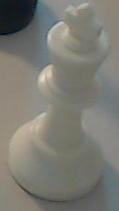

02c00069_black-queen.jpg  |  5


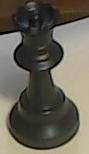

02c00124_black-king.jpg  |  18


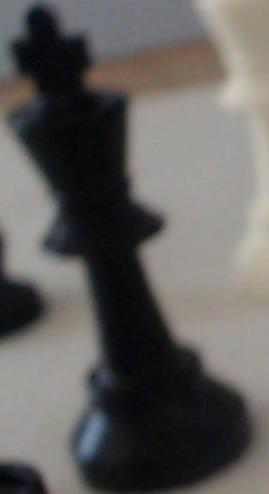

02c00057_black-king.jpg  |  17


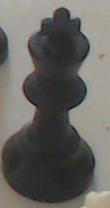

01c00054_white-queen.jpg  |  20


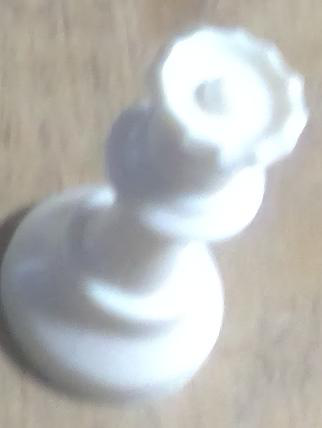

01c00029_white-bishop.jpg  |  18


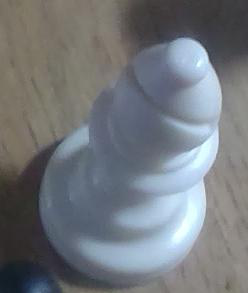

01c00052_white-bishop.jpg  |  8


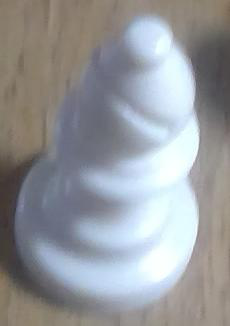

01c00010_black-queen.jpg  |  7


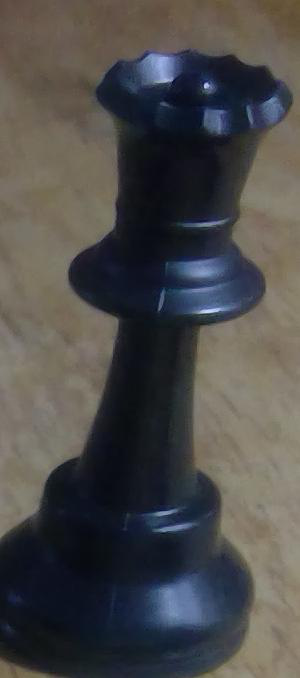

In [21]:
for imgfn, numcorrect in zip(difficult_imgfns, difficult_numcorrect):
    print(imgfn.split('/')[-1], ' | ', str(numcorrect) )
    display(Image.open(imgfn))

##### Top 5 models

In [34]:
max_correct = 2
mask_difficult = (df_correct_top5.sum(axis=1) <= max_correct)
difficults = df_pred[mask_difficult]
difficults.iloc[:,:4]

,fn,label,actual,pred_expmod-a-18
45,02c00069_black-queen.jpg,black-queen,4,4
51,02c00124_black-king.jpg,black-king,1,2
83,01c00054_white-queen.jpg,white-queen,10,4
106,01c00029_white-bishop.jpg,white-bishop,6,0
116,01c00052_white-bishop.jpg,white-bishop,6,0
158,01c00010_black-queen.jpg,black-queen,4,5


In [35]:
difficult_imgfns = [test_path + e for e in difficults['fn'].tolist()]
difficult_numcorrect = df_correct.sum(axis=1)[mask_difficult]

In [52]:
[e.split('/')[-1] for e in difficult_imgfns]

['02c00069_black-queen.jpg',
 '02c00124_black-king.jpg',
 '01c00054_white-queen.jpg',
 '01c00029_white-bishop.jpg',
 '01c00052_white-bishop.jpg',
 '01c00010_black-queen.jpg']

02c00069_black-queen.jpg  |  5


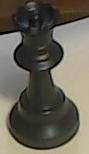

02c00124_black-king.jpg  |  18


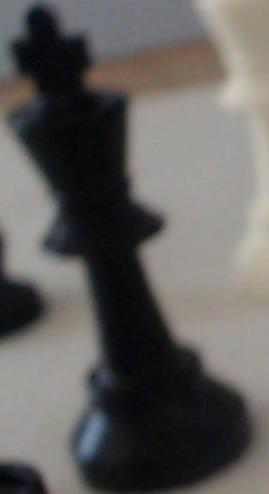

01c00054_white-queen.jpg  |  20


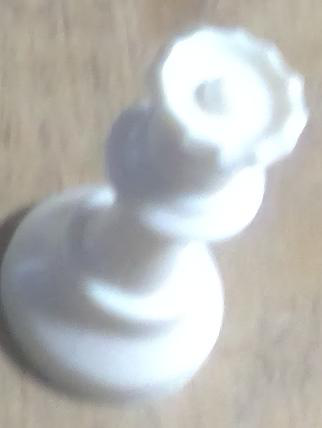

01c00029_white-bishop.jpg  |  18


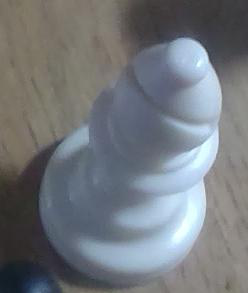

01c00052_white-bishop.jpg  |  8


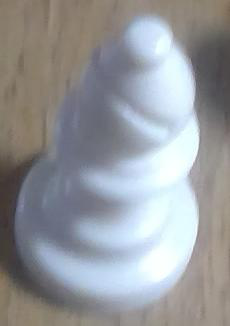

01c00010_black-queen.jpg  |  7


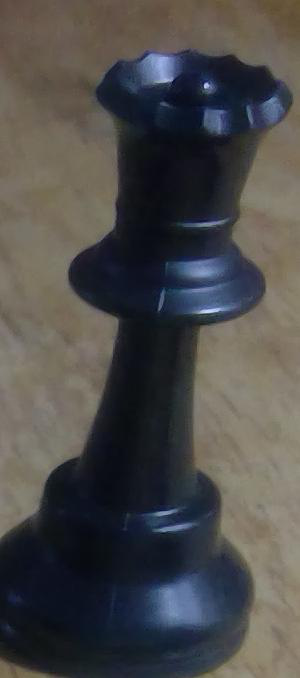

In [36]:
for imgfn, numcorrect in zip(difficult_imgfns, difficult_numcorrect):
    print(imgfn.split('/')[-1], ' | ', str(numcorrect) )
    display(Image.open(imgfn))

##### Easiest Images
Most of them are easy; skipping this section

---

#### Model Disagreement
First Look at stats on best model.

There ins't much room where other model are correct and th best model is worng.

In [37]:
cmp_model = 'expmod-b-1'

other_models = [col for col in df_correct.columns
                if col != cmp_model]

mask_cmp_correct =   (df_correct[cmp_model] == 1)
mask_cmp_incorrect = (df_correct[cmp_model] == 0)    

print(f"cmp model: {cmp_model} | " + 
      f"correct {mask_cmp_correct.sum()} " + 
      f"incorrect {mask_cmp_incorrect.sum()}")

cmp model: expmod-b-1 | correct 153 incorrect 9


In [38]:
theyre_correct = df_correct.loc[mask_cmp_incorrect, other_models]

theyre_correct.sum().sort_values(ascending=False)[:7]

expmod-b-6     8
expmod-b-14    8
expmod-b-10    8
expmod-b-18    7
expmod-b-13    7
expmod-b-17    7
expmod-b-27    6
dtype: int64

In [39]:
top5

['expmod-b-1', 'expmod-b-10', 'expmod-b-6', 'expmod-b-2', 'expmod-b-27']

**Looking as second best model vs. the others.**: more disagreemnt

In [40]:
cmp_model = 'expmod-b-6'

other_models = [col for col in df_correct.columns
                if col != cmp_model]

mask_cmp_correct =   (df_correct[cmp_model] == 1)
mask_cmp_incorrect = (df_correct[cmp_model] == 0)    

theyre_correct = df_correct.loc[mask_cmp_incorrect, other_models]

theyre_correct.sum().sort_values(ascending=False)[:7]

expmod-b-1     13
expmod-b-2     13
expmod-b-32    12
expmod-b-17    11
expmod-b-13    10
expmod-b-27    10
expmod-a-1     10
dtype: int64

#### Vote aggreagtion process
This used ot be an improvement over best model, now it does slightly worse.

Variations: 
 - only select b-cols (fully trained models)
 - only select top models

In [41]:
preds_df = df_pred.loc[:,[c for c in df_pred.columns if 'pred_' in c]]

these_cols = [col for col in preds_df.columns
             if '-b-' in col]

preds_df = df_pred.loc[:,these_cols]

vote_agg_1 = preds_df.T.apply(pd.value_counts).apply(np.argmax)

num_correct = (vote_agg_1 == df_pred['actual']).sum()

print(f"vote agg got {num_correct} correct")

vote agg got 156 correct


Excellent, 3 more correct than best model!

**Now let's aggregate only the top 4 models**

In [110]:
(df_agg.sort_values(by = 'test_loss', ascending=True)
     .T.iloc[:, :4].loc['test_loss',:])

Unnamed: 0
expmod-b-8.json    0.673801
expmod-b-1.json     0.67507
expmod-b-6.json    0.791359
expmod-b-0.json    0.807995
Name: test_loss, dtype: object

In [46]:
these_cols = [
    'pred_expmod-b-8',
    'pred_expmod-b-1',
    'pred_expmod-b-6',
    'pred_expmod-b-0',
]

these_cols = ['pred_' + e for e in top5]

In [47]:
preds_df = df_pred.loc[:,[c for c in df_pred.columns if 'pred_' in c]]

preds_df = df_pred.loc[:,these_cols]

vote_agg_1 = preds_df.T.apply(pd.value_counts).apply(np.argmax)

num_correct = (vote_agg_1 == df_pred['actual']).sum()

print(f"vote agg got {num_correct} correct")

vote agg got 158 correct


Excellent, better than best model by 5 images (3%), raising total acc to 97%.

In [50]:
158 / 162

0.9753086419753086